## Healthcare Diabetes Capstone Project 
#### By Ifalore Simeon

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Problem Statement:

Build a model to accurately predict whether the patients in the dataset have diabetes or not?

Dataset Description:

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.


<ul>
</ul>
<li> Pregnancies: Number of times pregnant  </li>
<li> Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test  </li>
<li>  BloodPressure: Diastolic blood pressure (mm Hg) </li>
<li>  SkinThickness: Triceps skin fold thickness (mm)</li>
<li> Insulin: 2-Hour serum insulin (mu U/ml) </li>
<li> BMI: Body mass index (weight in kg/(height in m)^2) </li>
<li> DiabetesPedigreeFunction: Diabetes pedigree function</li>
<li> Age: Age (years) </li>

<li> Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0 </li>
</ul>










In [1]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier


# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score,average_precision_score, recall_score, f1_score,  precision_recall_curve
from sklearn.metrics import plot_roc_curve,accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.tree import plot_tree

#getting rid of the warning notification 
import warnings
warnings.filterwarnings("ignore")

np.random.seed(22222134)

In [2]:
data = pd.read_csv("C:\\Users\\Simeon\\Desktop\\health care diabetes.csv")

In [3]:
data.head() #checking the top first five rows of data 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# is there any null or NA values in my data ?
data.isnull().any().sum()

# but what if there are 0 values these will not appear as null or NA so let's check to see



0

In [5]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
data[data['Glucose']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [7]:
(data == 0).astype(int).sum(axis=0)
# we see the amount of zero values in each feature

# we can ignore the Outcome since it is our targte valure and it is normal for it to contain zero's

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [8]:
# checking the percentage of 0 in each features 

Glu_percent = round(((5/768)*100),2)
Skin_percent =round(((227/768)*100),2)
BP_percent = round(((35/768)*100),2)
BMI_percent = round(((11/768)*100),2)
Ins_percent = round(((374/768)*100),2)

In [9]:
percent_info = print(f'your percent missing data for \n Glucose is {Glu_percent}% \n for BloodPressure it is {BP_percent}% \
\n for BMI is {BMI_percent}% \n for Insulin is {Ins_percent}% and \n for SkinThickness {Skin_percent}% ')

your percent missing data for 
 Glucose is 0.65% 
 for BloodPressure it is 4.56% 
 for BMI is 1.43% 
 for Insulin is 48.7% and 
 for SkinThickness 29.56% 


In [10]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
# I will fill up all the data with their mean to reduce noise but first I 
 #need to replace 0 with NaN so I can use the fillna fucntion
from numpy import nan
data_filled = data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']].replace(0,nan)



In [12]:
(data_filled==0).astype(int).sum(axis=0) #as we can see no more zero values but I expect there to be NAN now

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
# checking NAN values 
data_filled.isna().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [14]:
# filling the NAN values with their mean 
data_filled.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,657.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,268.0
mean,4.494673,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,1.0
std,3.217291,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.0
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,1.0
25%,2.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,1.0
50%,4.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,1.0
75%,7.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.0
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.0


In [15]:
data_filled.fillna(data.mean(),inplace = True)

In [16]:
data_filled.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.400782,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.576145
std,2.984162,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.310515
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.348958
25%,2.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.348958
50%,3.845052,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.348958
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [17]:
# since we see that the dat doesn't have any null values , how about duplicates ?

data_filled.duplicated().sum()

0

In [18]:
# next I want to see info about my dataset 
data_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


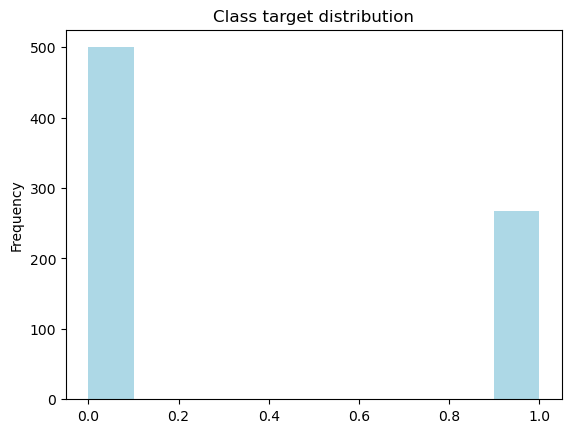

In [19]:
#checking the distribution of the target variable of the data for bias

data['Outcome'].plot(kind = 'hist', color = 'lightblue')
plt.title('Class target distribution');

In [20]:
data['Outcome'].value_counts()  #we see the exact values of the targetb of the dataset 




0    500
1    268
Name: Outcome, dtype: int64

we can see that the daata is imbalance wich is expected because it is a real life scenario.
To solve this I can use the right Evaluation metric or Undersample the abundant class

''

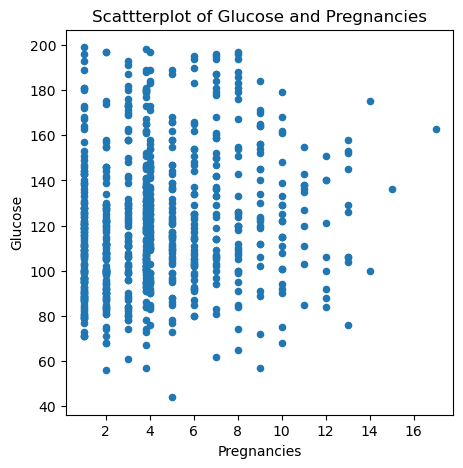

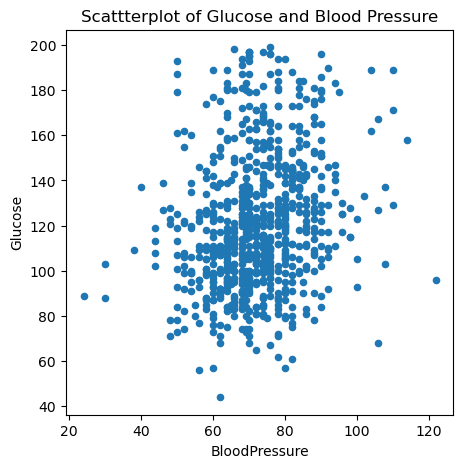

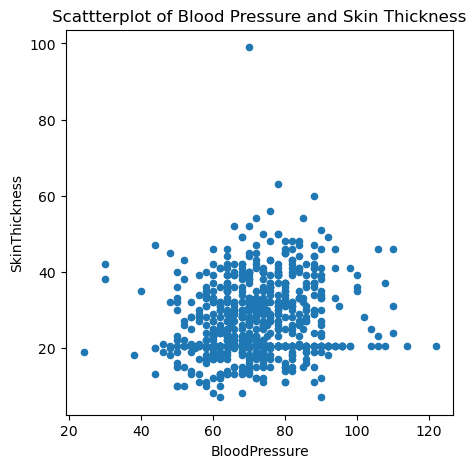

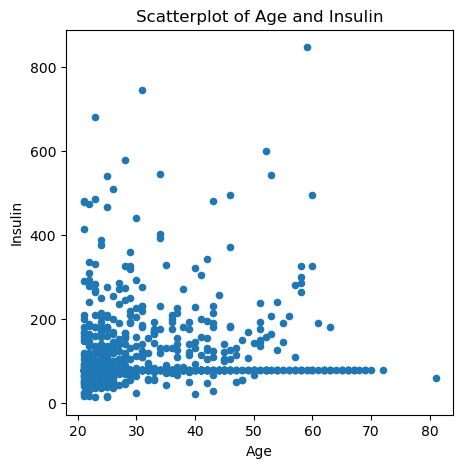

In [21]:
# Create scatter charts between the pair of variables to understand the relationships. Describe your findings.
data_filled.plot(kind = 'scatter', x ='Pregnancies', y = 'Glucose', title = 'Scattterplot of Glucose and Pregnancies', figsize = (5,5)),
data_filled.plot(kind = 'scatter', x ='BloodPressure', y = 'Glucose', title = 'Scattterplot of Glucose and Blood Pressure',figsize = (5,5))
data_filled.plot(kind = 'scatter', x = 'BloodPressure', y = 'SkinThickness', title = 'Scattterplot of Blood Pressure and Skin Thickness', figsize = (5,5))
data_filled.plot(kind = 'scatter', x = 'Age', y = 'Insulin', title = 'Scatterplot of Age and Insulin', figsize = (5,5))

;
# Pregnancies Glucose BloodPressure SkinThickness Insulin BMI

In [22]:
### correlation matrix
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


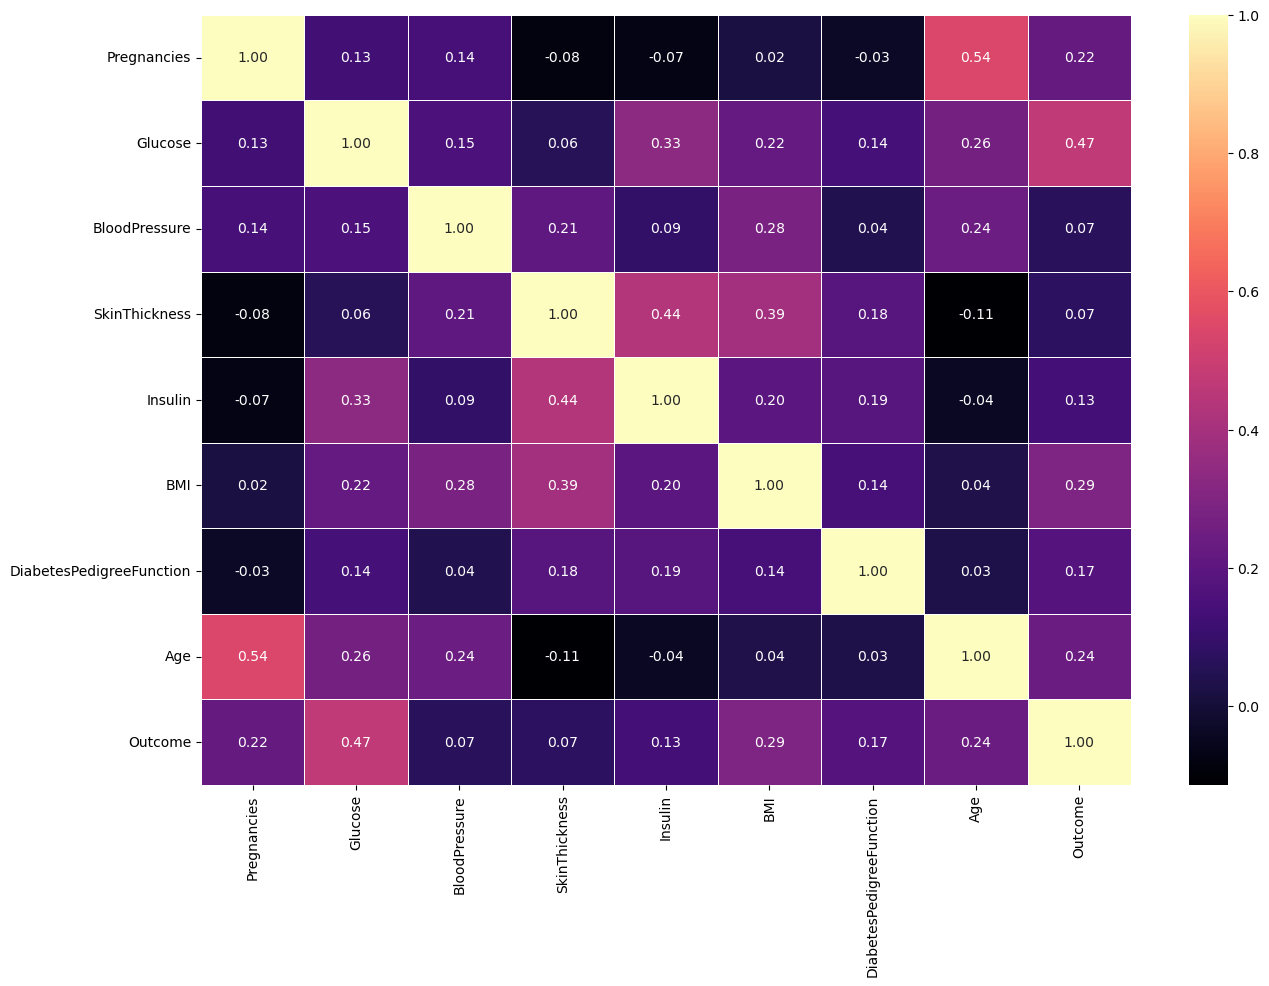

In [23]:
### create correlation heat map to see the correlation 

#This will adjust the shape of the heatmap created 
plt.figure(figsize=(15, 10))

#create the heatmap 
sns.heatmap(data.corr(),annot = True, linewidths=0.5,
                 fmt=".2f",
                 cmap= "magma" );

**Correlation Analysis**


From the scatterplot,corr function and correlation heatmap  We see a positive correlation between 
 <ul>
>  <li>Age and Pregnancies</li>
>  <li>Age and Glucose</li>
>  <li>BMI and SKin Thickness</li>
>  <li>Insulin and SKin Thickness</li>
    
    

  
and a Negative correlation between


>  <li>Insulin and Pregnancies</li>
>  <li>Age and Insulin</li>
>  <li>Age and SKin Thickness</li>

    
    
  </ul>

### Data Modeling: 
This is a classification problem, so I will be trying different classification models. 

- Logistic regression
- Naive Bayes
- Random Forest Classifier
- Decision Tree 

I will build the following models and compare them to the KNN model 
- K Nearest Neighbour 

My approach is to split the data into train and test and apply the following models to train the features.

Then I will check their accuracy scores and also the roc/auc 

In [24]:
# creating the features and label

# Split data into X and y
X = data_filled.drop("Outcome", axis=1)

y = data["Outcome"]


In [25]:

#creating Training and testing dataset 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size=0.2,
                                                random_state = 10)

### Logisitic regression model

In [26]:
#Create Logistic regression model
logRegModel = LogisticRegression()



In [27]:
# Fit the model to the training data
logRegModel.fit(X_train,y_train)

# Predict on the test data
y_pred = logRegModel.predict(X_test)

In [28]:

# print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logRegModel.score(X_test, y_test)))


In [29]:
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7597402597402597


In [30]:
# using confusin matrix to evalaute performance

confusion_matrix_ = confusion_matrix(y_test, y_pred)
print(confusion_matrix_)

[[86  9]
 [28 31]]


In [31]:
 #creating a function to always plot confusion matrix 
def plot_conf_mat(y_test, y_pred):
    """
    Plots a confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(5,5
                                   ))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    plt.title("Confusion Matrix")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    


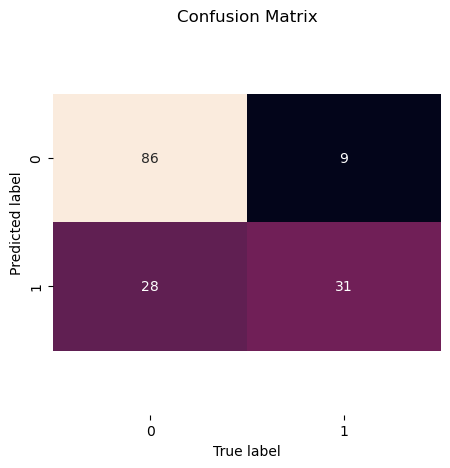

In [32]:
plot_conf_mat(y_test,y_pred)


In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.91      0.82        95
           1       0.78      0.53      0.63        59

    accuracy                           0.76       154
   macro avg       0.76      0.72      0.72       154
weighted avg       0.76      0.76      0.75       154



AUC: 0.715


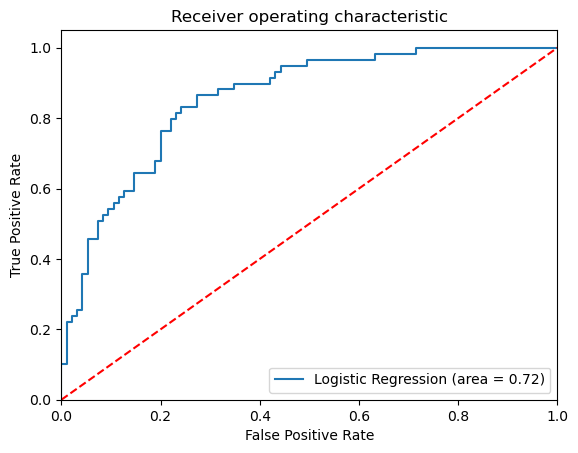

In [34]:
logit_roc_auc = roc_auc_score(y_test, logRegModel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logRegModel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
print('AUC: %.3f' % logit_roc_auc)
plt.show()

### Naive Bayes

In [35]:
# creating the model
nbmodel = GaussianNB()

# training the model
nbmodel.fit(X_train,y_train)

# predicting with the model 
y_pred_nb = nbmodel.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred_nb)
print("Accuracy:", accuracy)

Accuracy: 0.7337662337662337


In [36]:
# using confusin matrix to evalaute performance

confusion_matrix_ = confusion_matrix(y_test, y_pred_nb)
print(confusion_matrix_)

[[83 12]
 [29 30]]


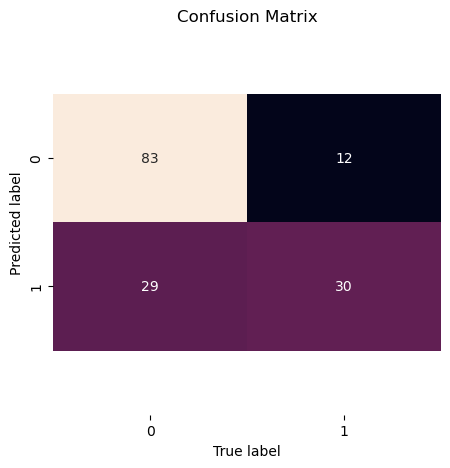

In [37]:
plot_conf_mat(y_test,y_pred_nb)

AUC: 0.691


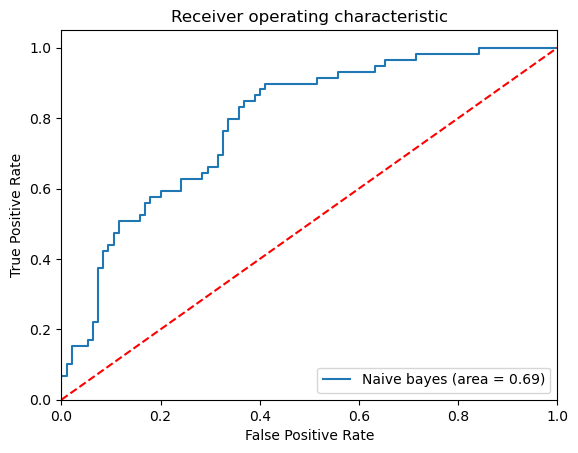

In [38]:
# creating AUROC for the model

nb_roc_auc = roc_auc_score(y_test, nbmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, nbmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Naive bayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
print('AUC: %.3f' % nb_roc_auc)
plt.show()

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.91      0.82        95
           1       0.78      0.53      0.63        59

    accuracy                           0.76       154
   macro avg       0.76      0.72      0.72       154
weighted avg       0.76      0.76      0.75       154



### Decision Tree 



In [40]:
for i in range(3,20):
    print("For max_depth = ",i)
    DTModel = DecisionTreeClassifier(max_depth=i)
    DTModel.fit(X_train,y_train)
    y_pred = DTModel.predict(X_test)
    print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

For max_depth =  3
Accuracy: 0.6883116883116883
For max_depth =  4
Accuracy: 0.7597402597402597
For max_depth =  5
Accuracy: 0.7467532467532467
For max_depth =  6
Accuracy: 0.7727272727272727
For max_depth =  7
Accuracy: 0.7532467532467533
For max_depth =  8
Accuracy: 0.7597402597402597
For max_depth =  9
Accuracy: 0.7532467532467533
For max_depth =  10
Accuracy: 0.7272727272727273
For max_depth =  11
Accuracy: 0.7532467532467533
For max_depth =  12
Accuracy: 0.7402597402597403
For max_depth =  13
Accuracy: 0.6948051948051948
For max_depth =  14
Accuracy: 0.7142857142857143
For max_depth =  15
Accuracy: 0.7142857142857143
For max_depth =  16
Accuracy: 0.7207792207792207
For max_depth =  17
Accuracy: 0.7077922077922078
For max_depth =  18
Accuracy: 0.7142857142857143
For max_depth =  19
Accuracy: 0.7077922077922078


`Highest Accuracy of Decision Tree Model can be observed when max_Depth = 8`

In [41]:
# using the max_depth obtained to predict 
DTModel = DecisionTreeClassifier(max_depth=8)
DTModel.fit(X_train,y_train)
y_pred_DT = DTModel.predict(X_test)

In [42]:
accuracy = accuracy_score(y_test, y_pred_DT)
accuracy

0.7597402597402597

In [43]:
print('Accuracy of Decision Tree regression classifier on test set: {:.2f}'.format(DTModel.score(X_test, y_test)))

Accuracy of Decision Tree regression classifier on test set: 0.76


In [44]:

confusion_matrix_ = confusion_matrix(y_test, y_pred_DT)
print(confusion_matrix_)

[[79 16]
 [21 38]]


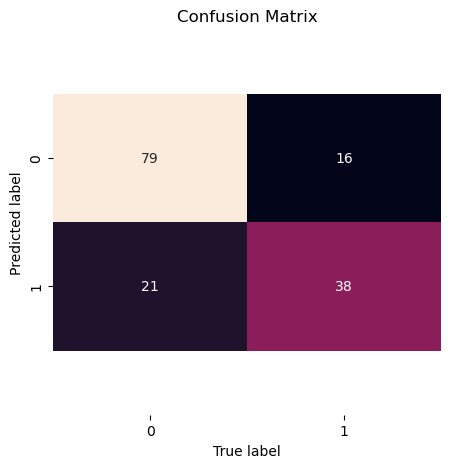

In [45]:
plot_conf_mat(y_test, y_pred_DT)

In [46]:
# looking at the classification report for the Decision Tree model 
print(classification_report(y_test, y_pred_DT))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81        95
           1       0.70      0.64      0.67        59

    accuracy                           0.76       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



In [47]:
# adding features and classs as labels to our decision trees 
feature = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
class_names = ['yes', 'no']

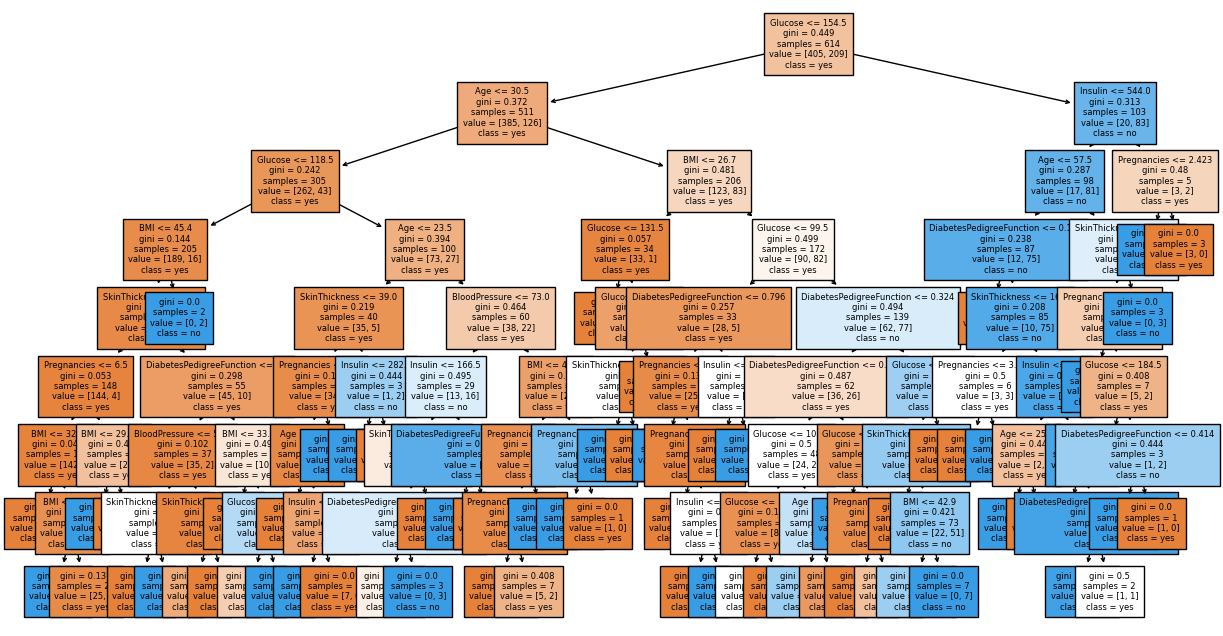

In [48]:
# also woul like to plot the tree to see how the decsiion tree was made 

plt.figure('Decision tree', figsize =(15,8))
plot_tree(DTModel, fontsize = 6, filled = True,feature_names = feature, class_names = class_names)
plt.show()


AUC: 0.738


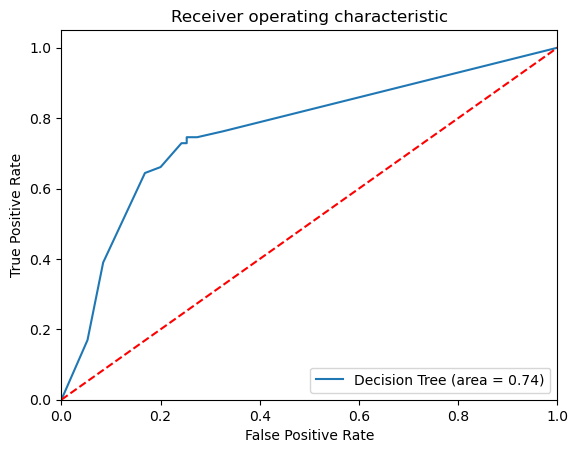

In [49]:
# creating AUROC for the model

dt_roc_auc = roc_auc_score(y_test, DTModel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, DTModel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
print('AUC: %.3f' % dt_roc_auc)
plt.show()

### Random Forest classifier

In [50]:
#Building the model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [51]:
accuracy = accuracy_score(y_test,y_pred_rf)
accuracy

0.7532467532467533

In [52]:
print('Accuracy of Random Forest regression classifier on test set: {:.2f}'.format(accuracy_score(y_test,y_pred_rf)))

Accuracy of Random Forest regression classifier on test set: 0.75


In [53]:
confusion_matrix_rf = confusion_matrix(y_test, y_pred)
print(confusion_matrix_)

[[79 16]
 [21 38]]


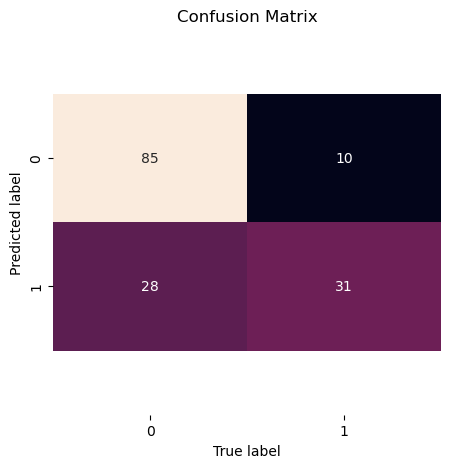

In [54]:
plot_conf_mat(y_test,y_pred_rf)

In [55]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.75      0.89      0.82        95
           1       0.76      0.53      0.62        59

    accuracy                           0.75       154
   macro avg       0.75      0.71      0.72       154
weighted avg       0.75      0.75      0.74       154



AUC: 0.710


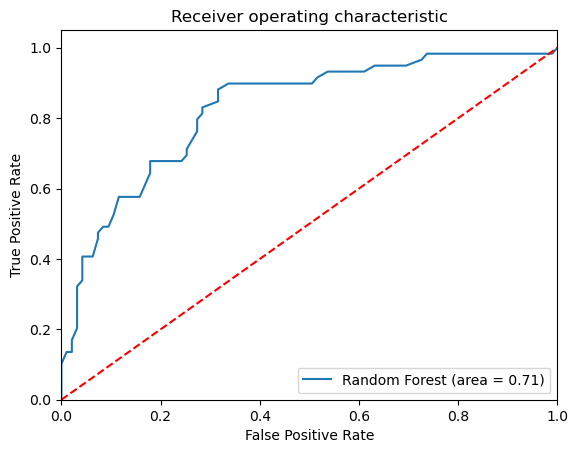

In [56]:
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
print('AUC: %.3f' % rf_roc_auc)
plt.show()

### KNN classifier

In [57]:
for i in range(3,20):
    print("n_neighbours = ",i)
    KNModel = KNeighborsClassifier(n_neighbors=i)
    KNModel.fit(X_train,y_train)
    y_pred =  KNModel.predict(X_test)
    print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

n_neighbours =  3
Accuracy: 0.6558441558441559
n_neighbours =  4
Accuracy: 0.6883116883116883
n_neighbours =  5
Accuracy: 0.7142857142857143
n_neighbours =  6
Accuracy: 0.7077922077922078
n_neighbours =  7
Accuracy: 0.7142857142857143
n_neighbours =  8
Accuracy: 0.7077922077922078
n_neighbours =  9
Accuracy: 0.7077922077922078
n_neighbours =  10
Accuracy: 0.7012987012987013
n_neighbours =  11
Accuracy: 0.6753246753246753
n_neighbours =  12
Accuracy: 0.7012987012987013
n_neighbours =  13
Accuracy: 0.6948051948051948
n_neighbours =  14
Accuracy: 0.7012987012987013
n_neighbours =  15
Accuracy: 0.6948051948051948
n_neighbours =  16
Accuracy: 0.6753246753246753
n_neighbours =  17
Accuracy: 0.6883116883116883
n_neighbours =  18
Accuracy: 0.6688311688311688
n_neighbours =  19
Accuracy: 0.6688311688311688


In [58]:
#Applying K-NN
from sklearn.neighbors import KNeighborsClassifier
knnClassifier = KNeighborsClassifier(n_neighbors=7)
knnClassifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [59]:
y_pred_knn = knnClassifier.predict(X_test)

In [60]:
accuracy = accuracy_score(y_pred_knn,y_test)
accuracy

0.7142857142857143

In [61]:
confusion_matrix_ = confusion_matrix(y_test, y_pred)
print(confusion_matrix_)

[[83 12]
 [39 20]]


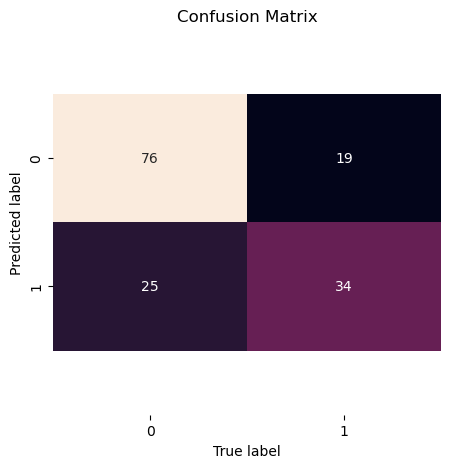

In [62]:
plot_conf_mat(y_test,y_pred_knn)

In [63]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.75      0.80      0.78        95
           1       0.64      0.58      0.61        59

    accuracy                           0.71       154
   macro avg       0.70      0.69      0.69       154
weighted avg       0.71      0.71      0.71       154



AUC: 0.688


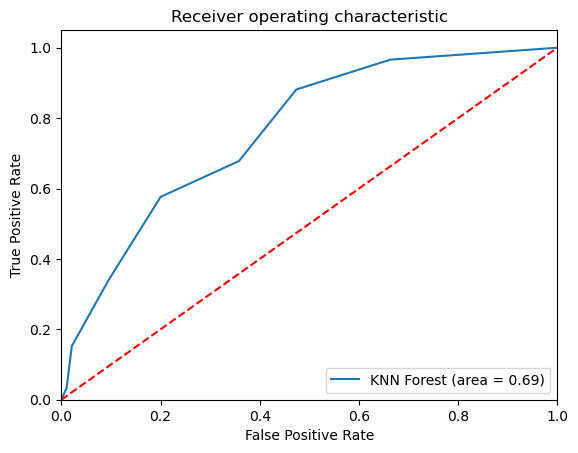

In [64]:
knn_roc_auc = roc_auc_score(y_test, knnClassifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, knnClassifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN Forest (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
print('AUC: %.3f' % knn_roc_auc)
plt.show()

### Conclusion 
In conclusion 

looking at the model accuracies for all the classification model we see 
- Logistic regression has an accuracy of 75.97%
- Naive Bayes has an accuracy of 73.37%
- Random Forest Classifier has an accuracy of 75.32%
- Decision Tree has an accuracy of 75.97%

compared to 
- K Nearest Neighbour which has an accuracy of 71.43%

But in terms of AUC Decision tree model has the highest score at 74% which means it has a higher capacity to discriminate True positive class from the negative when compared to the other models.

In [71]:
pwd

'C:\\Users\\Simeon'